In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

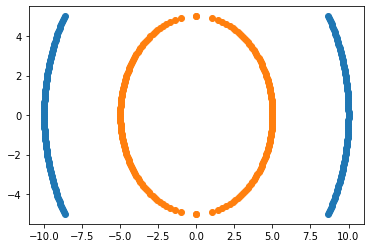

In [3]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [4]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0 #here we are creating the class1
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1 #here we are creating the class2
df = df1.append(df2)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [5]:
X=df.iloc[:,:-1]
y=df.Y

In [6]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
from sklearn.svm import SVC
sai=SVC(kernel="linear")
sai.fit(X_train,y_train)

SVC(kernel='linear')

In [13]:
y_predict=sai.predict(X_test)

In [15]:
sai.score(X_test,y_test)

0.45

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.45

# polynomial kernel

In [17]:
#compute the components of the polynomial kernel
df["X1_square"]=df["X1"]**2
df["X2_square"]=df["X2"]**2
df["X1*X2"]=(df["X1"]*df["X2"])

In [18]:
df

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
195,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


In [19]:
X=df[["X1","X2","X1_square","X2_square","X1*X2"]]
y=df.Y

In [20]:
X

,X1,X2,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009
...,...,...,...,...,...
195,-1.969049,-4.59596,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,0.999898,24.000102,4.898740


In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [32]:
#plot the graph
import plotly.express as px

fig = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1*X2',
              color='Y')
fig.show()

In [35]:
sai=SVC(kernel="linear")
sai.fit(X_train,y_train)
y_predict=sai.predict(X_test)

In [36]:
accuracy_score(y_test,y_predict)

1.0

In [38]:
sai.score(X_test,y_test)

1.0